<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/inventarioSimpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
! pip install simpy    # Instalamos la librería Simpy en nuestro entorno de Colab actual.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import simpy                       # Instalamos las librerías que utilizaremos durante el ejercicio.
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def generar_inter_llegadas():           # Función que genera el tiempo (días) transcurrido entre la llegada de un cliente y el sig.
  return np.random.exponential(1./5)    # Tiempo transcurrido.

In [30]:
def generar_demanda():              # Función que genera la demanda de un cliente que llegó a la tienda.
  return np.random.randint(1, 5)    # Demanda de un cliente.

In [33]:
def bodega_run(env, inv_ordenar, inv_max):    # Función (proceso) principal donde se inicializa y ejecuta el sistema estudiado.
  global inventario, balance, num_ordenado    # Declaramos variables globales que se utilizarán en cada una de las funciones.

  inventario = inv_max    # El inventario inicial es el inventario máximo que la tienda se propone a tener en existencia.
  balance = 0.0           # El balance (ganancia) inicial que tiene la tienda es cero, ya que el estudio apenas se iniciará.
  num_ordenado = 0        # Al tener en existencia el inventario "completo", obviamente aún no se ordena nuevamente ningún producto.

  while True:    # Se crea un ciclo infinito para recrear el sistema estudiado.

    inter_llegada = generar_inter_llegadas()    # Generamos el tiempo (días) transcurrido entre la llegada de los clientes.
    yield env.timeout(inter_llegada)            # El proceso actual se pausa durante el tiempo que tarda en llegar el siguiente
                                                #cliente.
    balance -= inventario*2*inter_llegada       # Se generan costos por día transcurrido y cantidad de productos en existencia.

    demanda = generar_demanda()    # Generamos la demanda de cada cliente que llega.
    if demanda < inventario:       # Si la demanda de un cliente es mayor que el inventario en existencia,
      balance += 100*demanda       #se generan ganancias por la cantidad demandada de productos
      inventario -= demanda        #y se le resta al inventario en existencia la cantidad vendida.

      print('{:.2f} se vendió {}'.format(env.now, inventario))    # Imprimimos en qué momento existe cierta cantidad de inventario.

    else:                          # Si la demanda de un cliente es menor que el inventario en existencia,
      balance += 100*inventario    #se generan ganancias por la cantidad de inventario restante en existencia
      inventario = 0               #y ya no existen existencias en el inventario.

      print('{:.2f} se vendió {} (sin existencias)'.format(env.now, inventario))   # Se imprime en qué momento ya no hay existencias.

    if inventario < inv_ordenar and num_ordenado == 0:    # Si el inventario en existencia es menor que el inventario mínimo que la
                                                          #tienda propone siempre tener en existencia y no hay ninguna orden de
                                                          #productos pendiente por llegar,
      env.process(manejar_orden(env, inv_max))            #agregamos el proceso de ordenar un nuevo lote de productos al ambiente de
                                                          #simulación.




def manejar_orden(env, inv_max):              # Función (proceso) donde se ordena un nuevo lote de productos.
  global inventario, balance, num_ordenado    # Se acceden a las variables globales declaradas anteriormente.

  num_ordenado = inv_max - inventario    # El no. de productos a ordenar son los suficientes para volver a tener el no. máximo.
  balance -= 50*num_ordenado             # Se generan costos por el no. de productos ordenados.

  print('{:.2f} orden solicitada por {}'.format(env.now, num_ordenado))    # En qué momento se solicitaron tantos productos.

  yield env.timeout(2.0)        # El proceso de ordenar más productos dura dos días, así que este se "pausa".
  inventario += num_ordenado    # Al llegar los nuevos productos, estos se agregan al conteo del inventario en existencia actual.
  num_ordenado = 0              # Ya no existen productos ordenados en espera a ser recibidos.

  print('{:.2f} orden recibida, {} en inventario'.format(env.now, inventario))    # Cuánto se recibió y se tiene ahora (productos).

In [32]:
def observacion(env):    # Función (proceso) que registra el nivel de inventario en un tiempo determinado.
  global inventario      # Accedemos a la variable global "inventario" previamente declarada.

  while True:    # Creamos un ciclo infinito para recrear la observación al sistema.

    obs_tiempos.append(env.now)            # Lista donde almacenamos los tiempos donde se realiza una observación.
    nivel_inventario.append(inventario)    # Lista donde almacenamos el nivel de inventario en el tiempo previamente almacenado.
    yield env.timeout(0.1)                 # Se registra una observación cada 0.1 días.

In [34]:
np.random.seed(0)    # Declaramos una semilla específica para poder estudiar el sistema con ciertos números aleatorios.

env = simpy.Environment()               # Creamos el entorno o ambiente de simulación para Simpy.
env.process(bodega_run(env, 10, 30))    # Agregamos el proceso principal al ambiente de simulación con parámetros específicos.

obs_tiempos = []         # Creamos lista vacía para registrar tiempos de cada observación.
nivel_inventario = []    # Creamos lista vacía para registrar los niveles de inventario de cada observación.

env.process(observacion(env))    # Agregamos el proceso de observación al ambiente de simulación.

env.run(until = 5.0)    # Ejecutamos el ambiente de simulación hasta el quinto día.

0.16 se vendió 28
0.53 se vendió 24
0.69 se vendió 22
0.88 se vendió 19
1.00 se vendió 16
1.01 se vendió 15
1.11 se vendió 12
1.44 se vendió 9
1.44 orden solicitada por 21
1.61 se vendió 7
1.97 se vendió 6
1.99 se vendió 2
2.08 se vendió 0 (sin existencias)
2.38 se vendió 0 (sin existencias)
2.79 se vendió 0 (sin existencias)
3.11 se vendió 0 (sin existencias)
3.26 se vendió 0 (sin existencias)
3.28 se vendió 0 (sin existencias)
3.44 orden recibida, 21 en inventario
3.46 se vendió 19
4.04 se vendió 15
4.06 se vendió 11
4.12 se vendió 7
4.12 orden solicitada por 23
4.39 se vendió 6
4.56 se vendió 5
4.63 se vendió 3
4.82 se vendió 2
4.92 se vendió 1


Text(0, 0.5, 'Nivel de inventario')

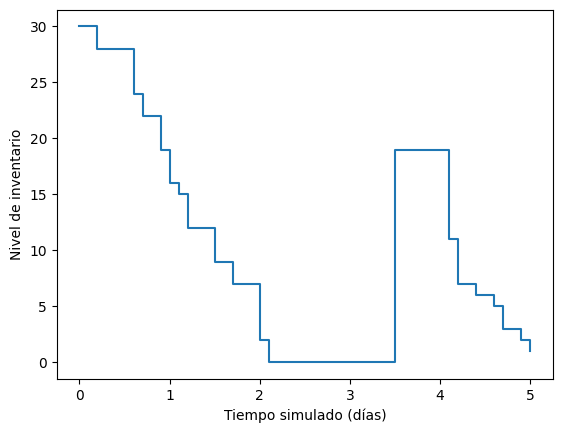

In [35]:
plt.figure()                                               # Imprimimos las observaciones obtenidas con los números aleatorios
plt.step(obs_tiempos, nivel_inventario, where = 'post')    #estudiados.
plt.xlabel('Tiempo simulado (días)')
plt.ylabel('Nivel de inventario')